# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
# import os
# os.environ['http_proxy']='http://dev-proxy.oa.com:8080'
# os.environ['https_proxy']='http://dev-proxy.oa.com:8080'
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, header = 0, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

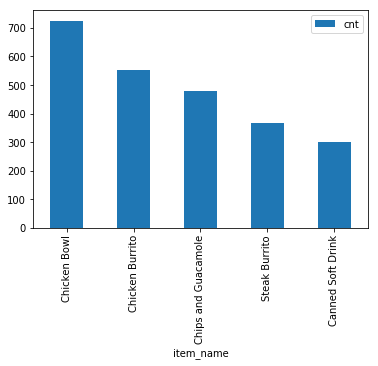

In [16]:
top5 = chipo['item_name'].value_counts()[0:5].to_frame().reset_index()
top5.columns = ['item_name', 'cnt']
top5.plot(kind = 'bar', x = 'item_name', y = 'cnt')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0, 766.4613119700849)

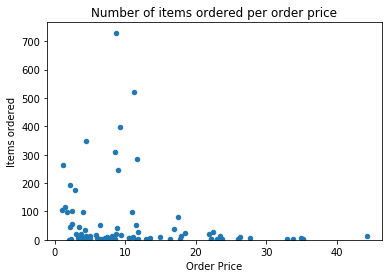

In [21]:
# 不理解业务 不追求做法的准确性 重点在于语法、用法的掌握
price_numorder = chipo.groupby(['item_price']).agg('sum')['quantity'].reset_index()
price_numorder.columns = ['item_price', 'numorder']
price_numorder['item_price'] = price_numorder['item_price'].apply(lambda x: float(x.strip('$')))
# 与 plt.scatter 语法一致
price_numorder.plot(kind = 'scatter', x = 'item_price', y = 'numorder')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.